In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('../data/refined/imoveis.csv')

In [14]:
df.head()

,Unnamed: 0.1,Unnamed: 0,id,url,header,address,amenities,crawler,crawled_at,Quarto,...,Espaço gourmet,Janela grande,Sala de almoço,Varanda,Perto de vias de acesso,Cabeamento estruturado,Condomínio fechado,Dependência de empregados,Área de lazer,Portaria 24h
0,0,0,2643030298,https://www.vivareal.com.br/imovel/apartamento...,"Apartamento com Quarto à Venda, 34m²","Rua Delegado Everton - Bela Vista, São Paulo - SP",Salão de festas,bela_vista,2023-07-09 20:55:00,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,2642957267,https://www.vivareal.com.br/imovel/apartamento...,"Apartamento com Quarto à Venda, 37m²","Rua Avanhandava - Bela Vista, São Paulo - SP","Aceita animais, Portaria 24h, Elevador, Acesso...",bela_vista,2023-07-09 20:55:00,1,...,0,0,0,0,0,0,0,0,0,1
2,2,2,2643109473,https://www.vivareal.com.br/imovel/apartamento...,"Apartamento com Quarto à Venda, 35m²","Rua Genebra, 197 - Bela Vista, São Paulo - SP","Aceita animais, Ar-condicionado",bela_vista,2023-07-09 20:55:00,1,...,0,0,0,0,0,0,0,0,0,0
3,3,3,2642725523,https://www.vivareal.com.br/imovel/apartamento...,"Apartamento com 2 Quartos à Venda, 75m²","Avenida Brigadeiro Luís Antônio, 1930 - Bela V...","Condomínio fechado, Aceita animais, Portaria 2...",bela_vista,2023-07-09 20:55:00,2,...,0,0,0,0,0,0,1,0,0,1
4,4,4,2643100739,https://www.vivareal.com.br/imovel/apartamento...,"Apartamento com Quarto à Venda, 45m²","Rua Abolição, 165 - Bela Vista, São Paulo - SP","Piscina, Elevador, Condomínio fechado, Aceita ...",bela_vista,2023-07-09 20:55:00,1,...,0,0,0,0,0,0,1,0,0,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4066 entries, 0 to 4065
Data columns (total 96 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0.1                  4066 non-null   int64  
 1   Unnamed: 0                    4066 non-null   int64  
 2   id                            4066 non-null   int64  
 3   url                           4066 non-null   object 
 4   header                        4066 non-null   object 
 5   address                       4066 non-null   object 
 6   amenities                     3411 non-null   object 
 7   crawler                       4066 non-null   object 
 8   crawled_at                    4066 non-null   object 
 9   Quarto                        4066 non-null   int64  
 10  Banheiro                      4066 non-null   int64  
 11  Garagem                       4066 non-null   int64  
 12  condominio                    3934 non-null   float64
 13  pre

In [16]:
df.shape

(4066, 96)

In [17]:
df['crawler'].value_counts()

liberdade     1078
saúde         1073
bela_vista     981
brooklin       934
Name: crawler, dtype: int64

<Axes: xlabel='crawler'>

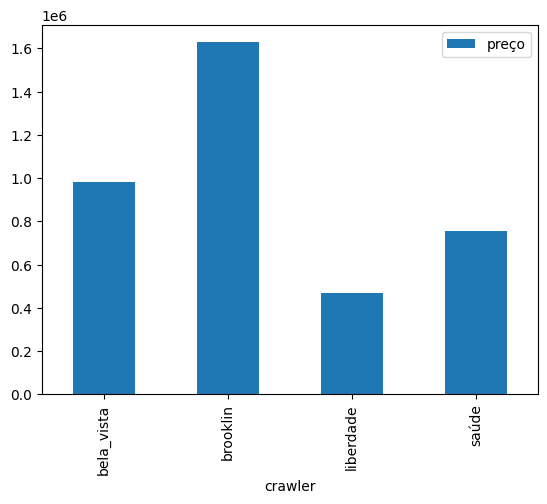

In [18]:
df.groupby('crawler').agg({'preço': "mean"}).plot(kind='bar')

<Axes: >

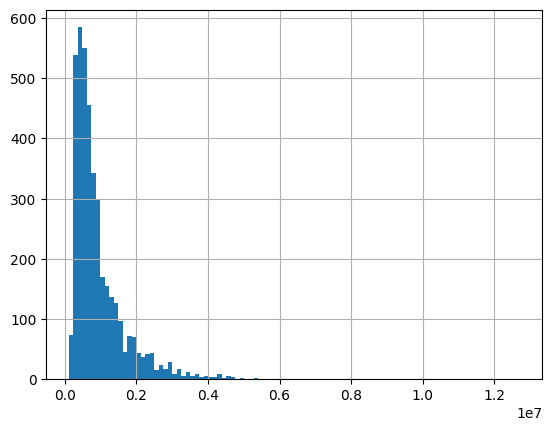

In [19]:
df['preço'].hist(bins=100)

<Axes: ylabel='preço'>

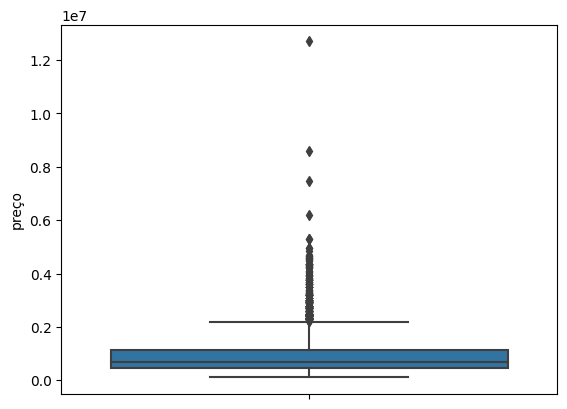

In [20]:
sns.boxplot(data = df, y = "preço")

<Axes: xlabel='crawler', ylabel='preço'>

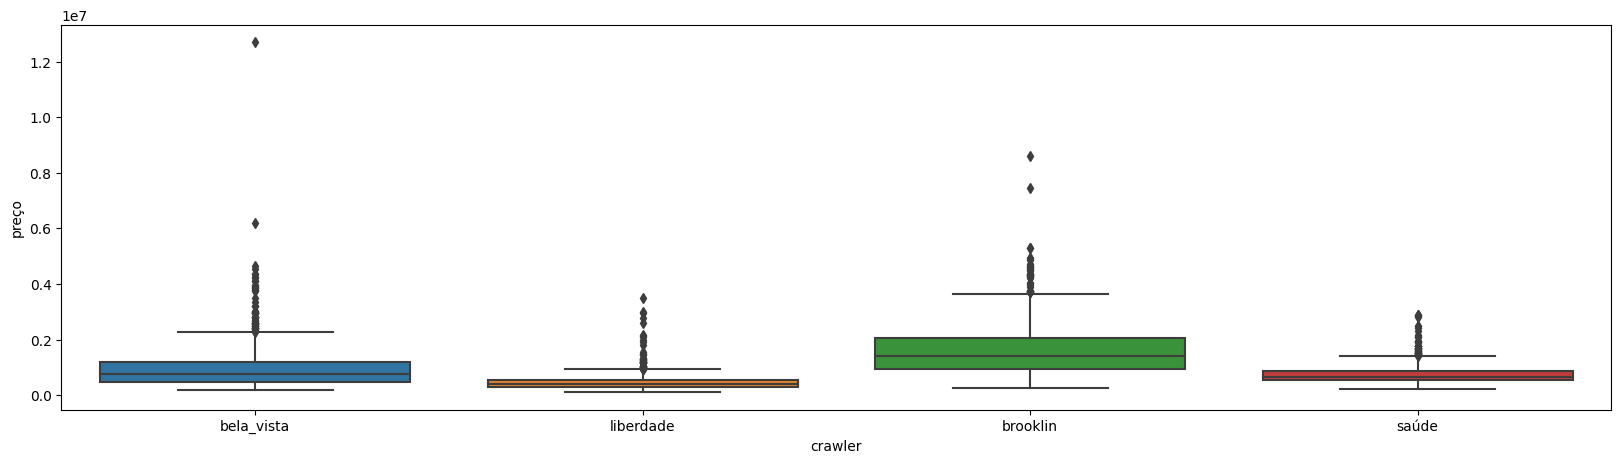

In [21]:
plt.figure(figsize=(20,5))
sns.boxplot(data = df, y = "preço", x = 'crawler')

In [22]:
df['preço'].value_counts()

650000    57
550000    53
450000    51
600000    49
350000    48
          ..
249840     1
207500     1
395600     1
502200     1
919900     1
Name: preço, Length: 1295, dtype: int64

<Axes: xlabel='preço', ylabel='area_limpo'>

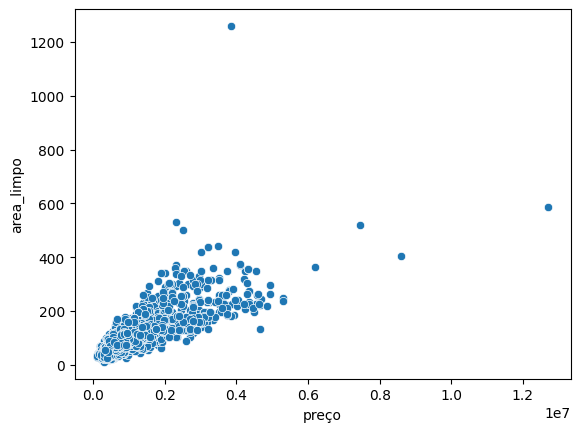

In [23]:
sns.scatterplot(data = df, y = "area_limpo", x = 'preço')